<a href="https://colab.research.google.com/github/RyanBurnsworth/KallerId/blob/master/Playground_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install necessary libraries**

In [ ]:
!pip install diffusers>=0.24.0

In [ ]:
!pip install transformers accelerate safetensors

## **Import libraries**

In [ ]:
from diffusers import DiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt
import torch

## **Create the methods needed**

In [ ]:
def generate_image(input_prompt: str) -> Image:
  pipe = DiffusionPipeline.from_pretrained(
      "playgroundai/playground-v2-1024px-aesthetic",
      torch_dtype=torch.float16,
      use_safetensors=True,
      add_watermarker=False,
      variant="fp16"
  )
  pipe.to("cuda")

  prompt = input_prompt
  image  = pipe(prompt=prompt, guidance_scale=3.0).images[0]

  return image

In [ ]:
def display_image(prompt: str, image: Image):
  plt.figure(figsize=(10,10))
  plt.axis("off")
  plt.title(prompt)
  plt.imshow(image)

In [ ]:
def reset_cuda_memory():
  try:
    torch.cuda.empty_cache()
  except:
    print("Error emptying cuda cache")

## **Generate your image from a prompt**

In [ ]:
PROMPT = "A hard at work software engineer building applied AI systems, detailed, 8k"
image = generate_image(PROMPT)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

## **Display and save the image. Reset CUDA memory when done**

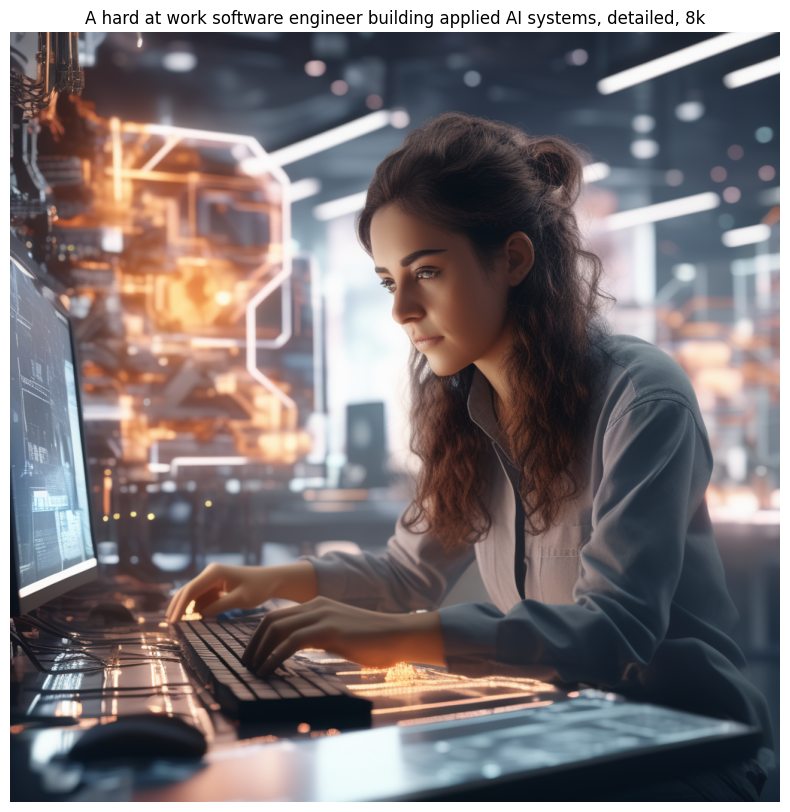

In [ ]:
OUTPUT_FILENAME="/content/dog_in_park.jpg"

display_image(PROMPT, image)
image.save(OUTPUT_FILENAME)

reset_cuda_memory()